# Analysis and Price Prediction for Auto Imports Data

### Description:

1. Title: 1985 Auto Imports Database

2. Source Information:
   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 19 May 1987
   -- Sources:
     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038 
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037

3. Past Usage:
   -- Kibler (1989).  Instance-based prediction
      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},
      51--57.
	 -- Predicted price of car using all numeric and Boolean attributes
	 -- Method: an instance-based learning (IBL) algorithm derived from a
	    localized k-nearest neighbor algorithm.  Compared with a
	    linear regression prediction...so all instances
	    with missing attribute values were discarded.  This resulted with
	    a training set of 159 instances, which was also used as a test
	    set (minus the actual instance during testing).
	 -- Results: Percent Average Deviation Error of Prediction from Actual
	    -- 11.84% for the IBL algorithm
	    -- 14.12% for the resulting linear regression equation

4. Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

### Data Cleansing has been sone in MS Excel. Missing values in any particular column have been filled with average values of that feature in that respective car company.

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [3]:
fd = pd.read_csv('UCI Automobile.csv')
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Normalised Losses  205 non-null    int64  
 2   Make               205 non-null    object 
 3   Fuel Type          205 non-null    object 
 4   Aspiration         205 non-null    object 
 5   Doors              205 non-null    int64  
 6   Style              205 non-null    object 
 7   Drive Type         205 non-null    object 
 8   Engine loc         205 non-null    object 
 9   Wheel Base         205 non-null    float64
 10  Length             205 non-null    float64
 11  Width              205 non-null    float64
 12  H8                 205 non-null    float64
 13  Curb W8            205 non-null    int64  
 14  Engine Type        205 non-null    object 
 15  Num of Cylinders   205 non-null    int64  
 16  Engine Size        205 non

In [4]:
fd.shape

(205, 26)

In [5]:
#Labelling categorical datatypes

fd['Make'] = fd['Make'].astype('category')
fd['Make_'] = fd['Make'].cat.codes

fd['Fuel Type'] = fd['Fuel Type'].astype('category')
fd['FuelType'] = fd['Fuel Type'].cat.codes

fd['Aspiration'] = fd['Aspiration'].astype('category')
fd['Aspiration_'] = fd['Aspiration'].cat.codes

fd['Style'] = fd['Style'].astype('category')
fd['Style_'] = fd['Style'].cat.codes

fd['Drive Type'] = fd['Drive Type'].astype('category')
fd['DriveType'] = fd['Drive Type'].cat.codes

fd['Engine loc'] = fd['Engine loc'].astype('category')
fd['Engine_loc'] = fd['Engine loc'].cat.codes

fd['Engine Type'] = fd['Engine Type'].astype('category')
fd['Engine_Type'] = fd['Engine Type'].cat.codes

fd['Fuel System'] = fd['Fuel System'].astype('category')
fd['Fuel_System'] = fd['Fuel System'].cat.codes



In [6]:
fd.head(3)

,Symboling,Normalised Losses,Make,Fuel Type,Aspiration,Doors,Style,Drive Type,Engine loc,Wheel Base,...,Highway MPG,Price,Make_,FuelType,Aspiration_,Style_,DriveType,Engine_loc,Engine_Type,Fuel_System
0,3,176,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,27,13495,0,1,0,0,2,0,0,5
1,3,176,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,27,16500,0,1,0,0,2,0,0,5
2,1,176,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,26,16500,0,1,0,2,2,0,5,5


In [7]:
df = fd.copy()
df.drop(['Make', 'Fuel Type', 'Aspiration', 'Style', 'Drive Type', 'Engine loc' , 'Engine Type', 'Fuel System'], axis = 1, inplace =True)

In [8]:
df.head(3)

,Symboling,Normalised Losses,Doors,Wheel Base,Length,Width,H8,Curb W8,Num of Cylinders,Engine Size,...,Highway MPG,Price,Make_,FuelType,Aspiration_,Style_,DriveType,Engine_loc,Engine_Type,Fuel_System
0,3,176,2,88.6,168.8,64.1,48.8,2548,4,130,...,27,13495,0,1,0,0,2,0,0,5
1,3,176,2,88.6,168.8,64.1,48.8,2548,4,130,...,27,16500,0,1,0,0,2,0,0,5
2,1,176,2,94.5,171.2,65.5,52.4,2823,6,152,...,26,16500,0,1,0,2,2,0,5,5


# Exploratory Data Analysis 

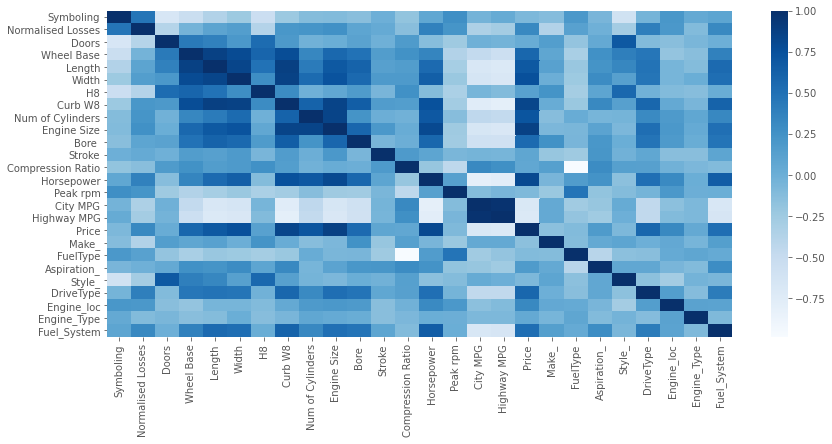

In [9]:
plt.figure(figsize = (14,6))
sns.heatmap(df.corr(), cmap ='Blues' )

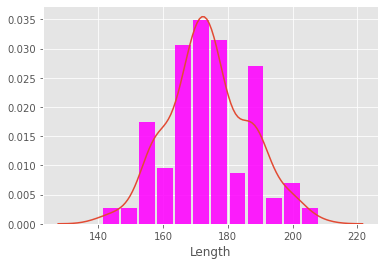

In [10]:
sns.distplot(df['Length'], hist_kws = {'rwidth':0.88, 'alpha':0.88, 'color': 'magenta'}, bins =12)

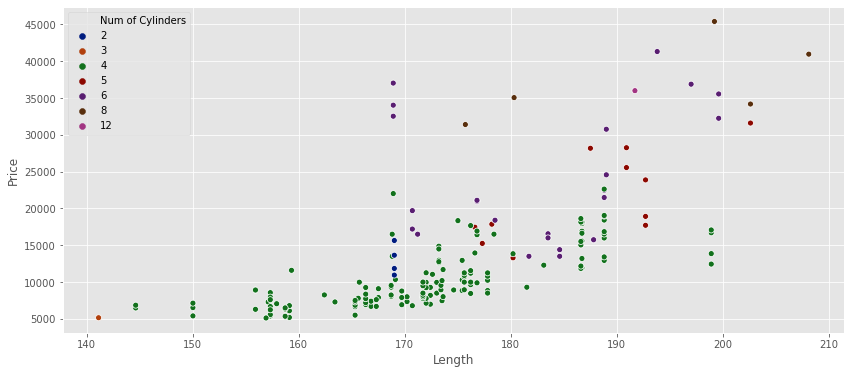

In [11]:
plt.figure(figsize = (14,6))
sns.scatterplot(x = df['Length'], y = df['Price'], hue = df['Num of Cylinders'],palette = 'dark' )

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

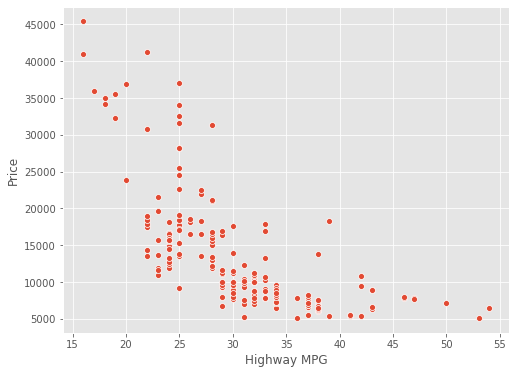

In [12]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Highway MPG'], y = df['Price'], palette = 'dark' )
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

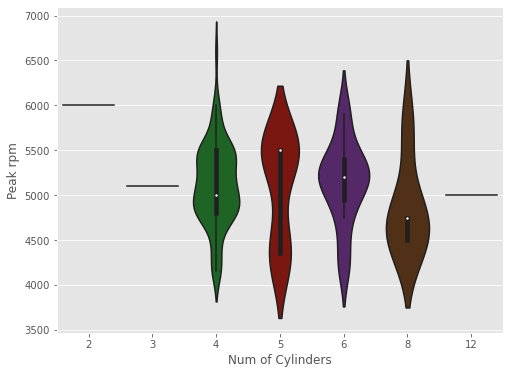

In [13]:
plt.figure(figsize = (8,6))

sns.violinplot(y= df['Peak rpm'], x = df['Num of Cylinders'], palette = 'dark')
plt.tight_layout

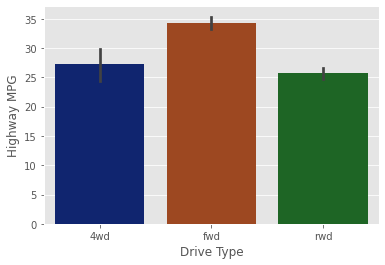

In [52]:
sns.barplot(x = fd['Drive Type'], y = fd['Highway MPG'], palette = 'dark')

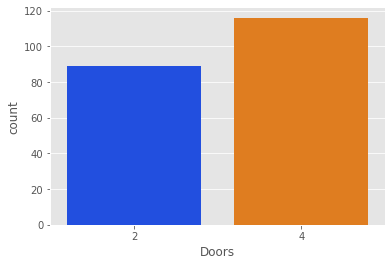

In [63]:
sns.countplot(df['Doors'],palette= 'bright')

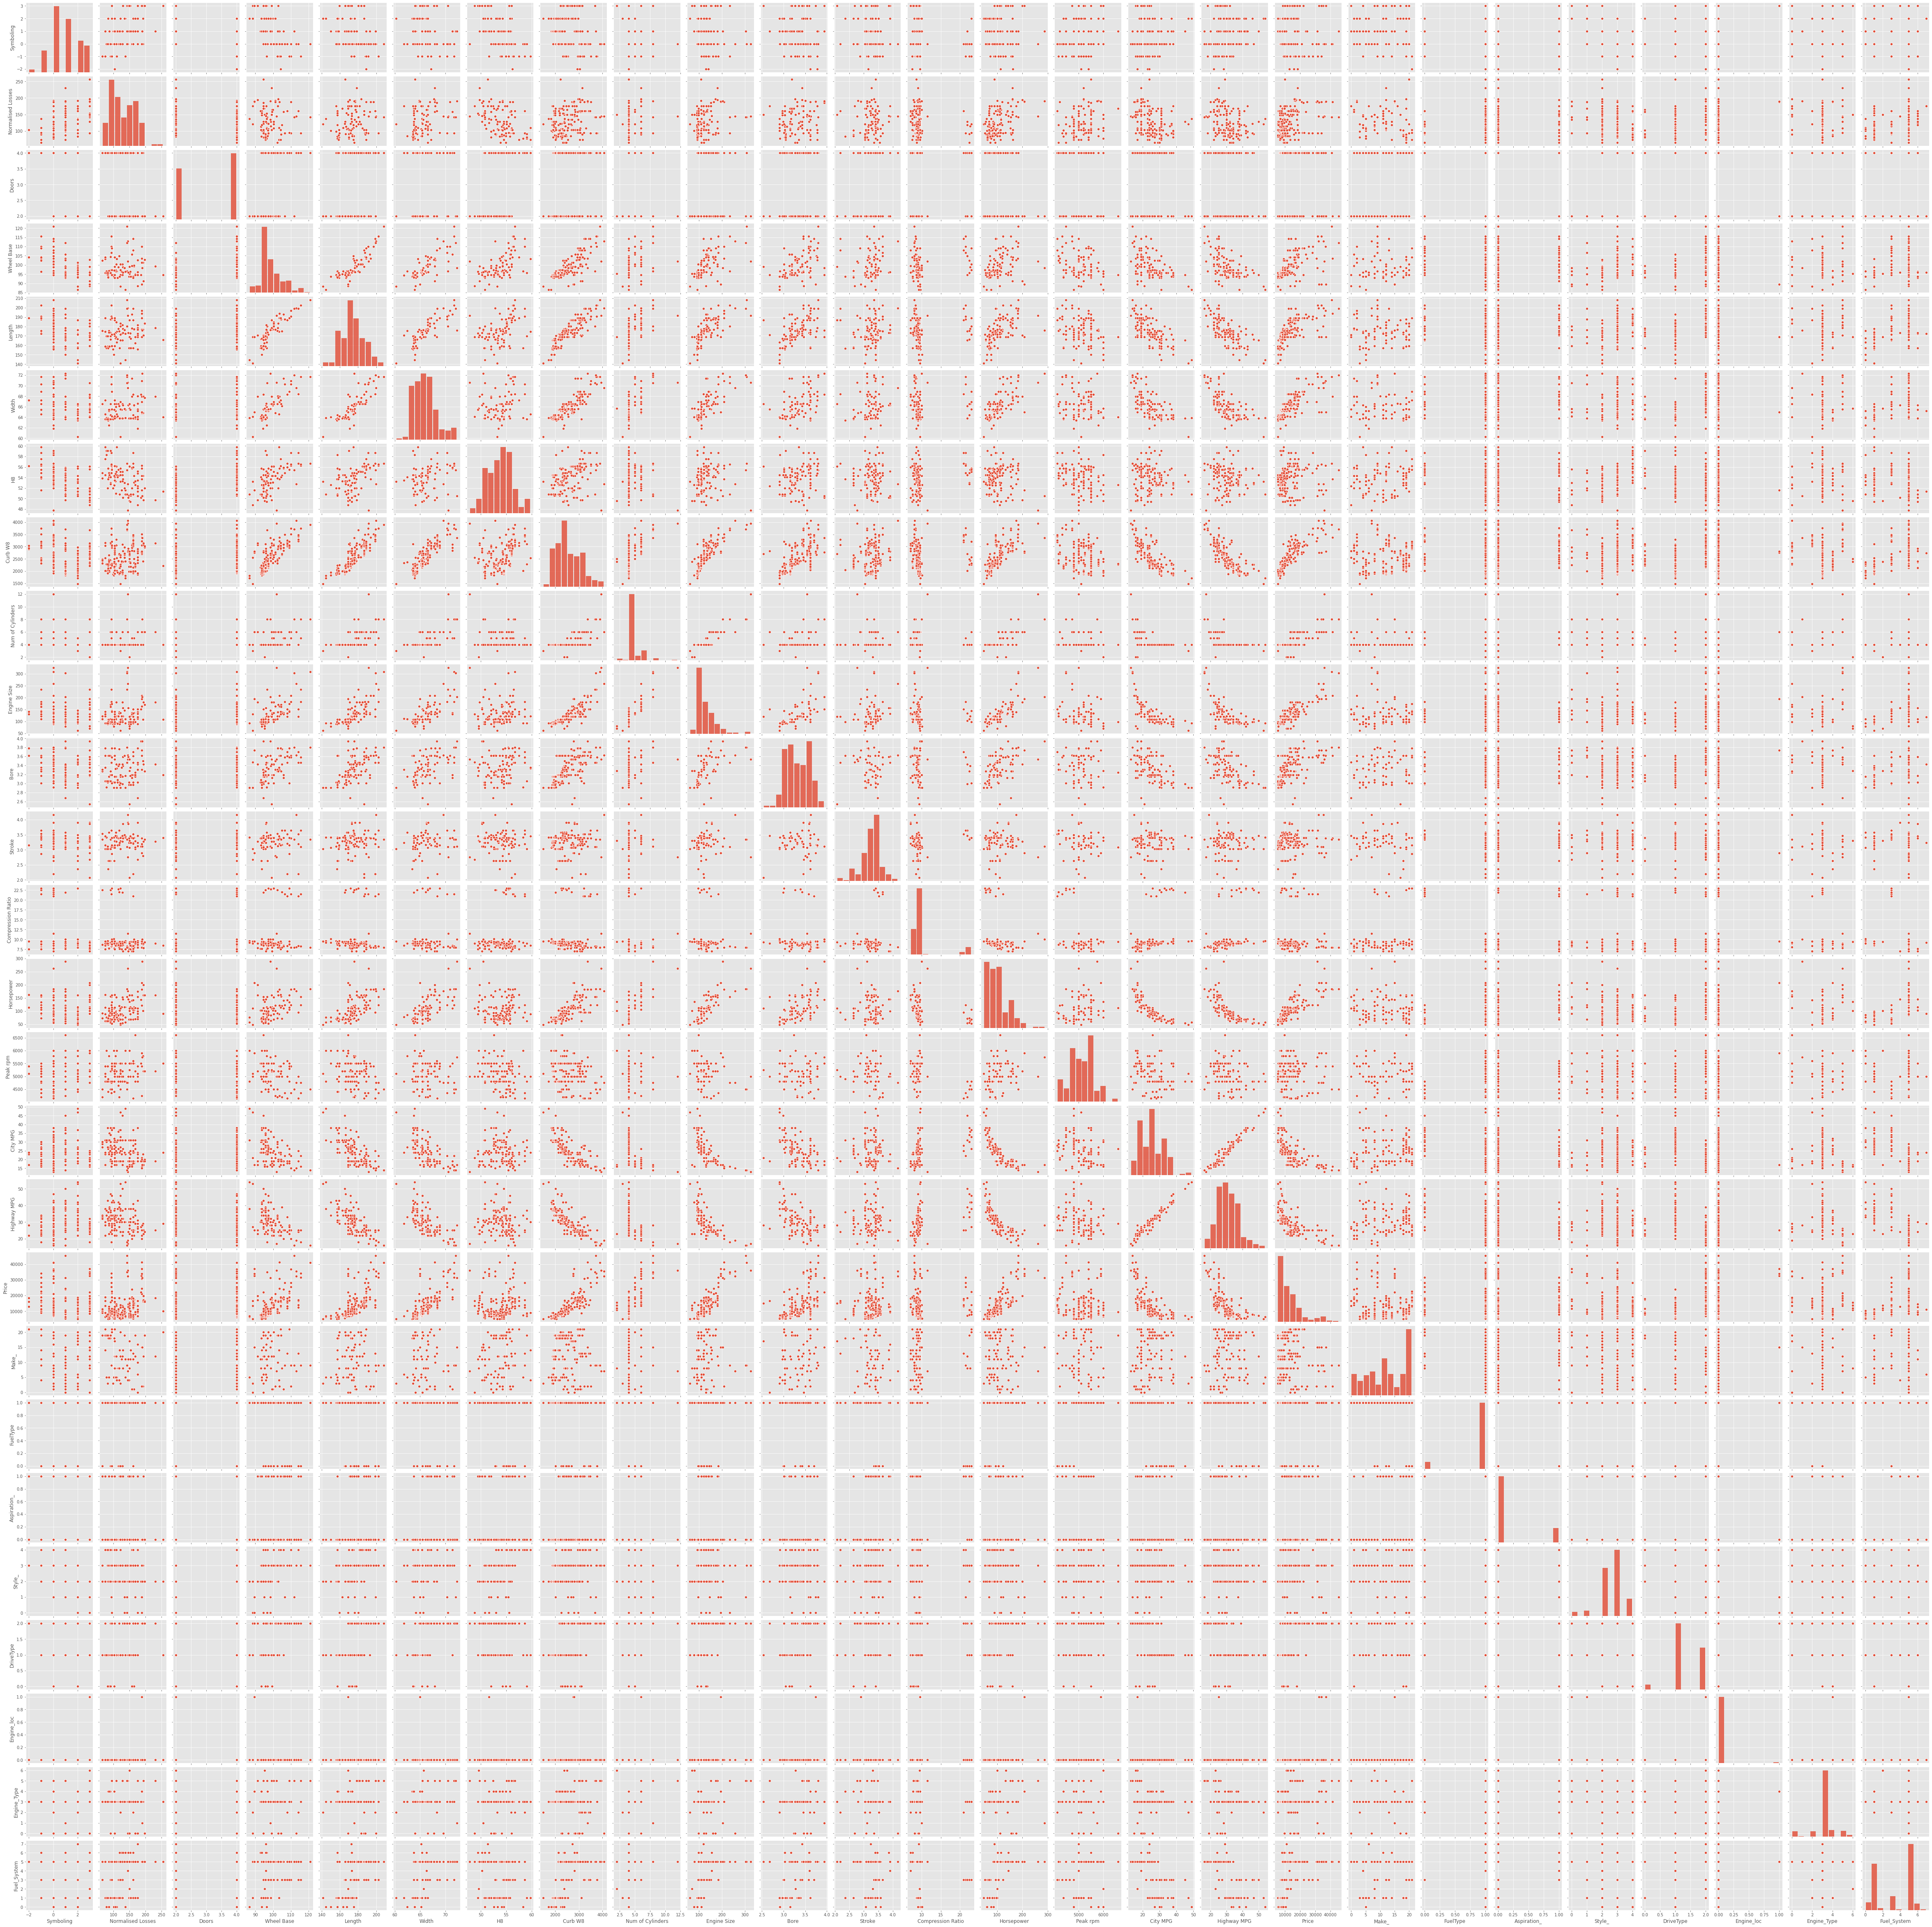

In [13]:
sns.pairplot(df, diag_kws= {'rwidth':0.88,'alpha': 0.8})

# Statistical Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Normalised Losses  205 non-null    int64  
 2   Doors              205 non-null    int64  
 3   Wheel Base         205 non-null    float64
 4   Length             205 non-null    float64
 5   Width              205 non-null    float64
 6   H8                 205 non-null    float64
 7   Curb W8            205 non-null    int64  
 8   Num of Cylinders   205 non-null    int64  
 9   Engine Size        205 non-null    int64  
 10  Bore               205 non-null    float64
 11  Stroke             205 non-null    float64
 12  Compression Ratio  205 non-null    float64
 13  Horsepower         205 non-null    int64  
 14  Peak rpm           205 non-null    int64  
 15  City MPG           205 non-null    int64  
 16  Highway MPG        205 non

# Fitting Linear Regression Model

In [16]:
x = df.drop('Price', axis =1)
y = fd['Price']

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()
X = sc.fit_transform(x)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm_ = lm.fit(X_train, y_train)

y_pred = lm_.predict(X_test)



In [64]:
#Quality of fit

from sklearn.metrics import mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


err_lm = np.sqrt(mean_squared_error(y_test, y_pred))
print(err_lm)
round(mean_absolute_percentage_error(y_test, y_pred),2)

3327.6753950737816


19.6

# L2 Regression (Ridge Regression)

In [21]:
from sklearn.linear_model import Ridge

rm = Ridge(alpha = 2, max_iter= 100000)
rm_ = rm.fit(X_train, y_train)

rm_pred = rm_.predict(X_test)
err_rm = np.sqrt(mean_squared_error(y_test, rm_pred))
err_rm

3237.2852296712726

# L1 Regression (Lasso Regression)

In [22]:
from sklearn.linear_model import Lasso

llm = Lasso(alpha = 2, max_iter= 10000000)
llm_ = llm.fit(X_train, y_train)

llm_pred = llm_.predict(X_test)
err_llm = np.sqrt(mean_squared_error(y_test, llm_pred))
print(err_llm)


3307.473460669331


# Regression Using Polynomial Features


In [47]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

lm2 = LinearRegression() 
lm2_ = lm2.fit(X_train_poly, y_train_poly)

lm2_pred = lm2_.predict(X_test_poly)

err_lm2 = np.sqrt(mean_squared_error(lm2_pred, y_test_poly))
print(round(err_lm2))



96905915122698.0


In [45]:
# L2 Regularisation with Degree2

from sklearn.linear_model import Ridge

rm2 = Ridge(alpha = 2, max_iter= 100000)
rm2_ = rm2.fit(X_train_poly, y_train_poly)

rm2_pred = rm2_.predict(X_test_poly)
err_rm2 = np.sqrt(mean_squared_error(y_test_poly, rm2_pred))
print(round(err_rm2))
round(mean_absolute_percentage_error(y_test_poly, rm2_pred),2)

2567.0


15.09

In [66]:
# L1 Regularisation with Degree 2

from sklearn.linear_model import Lasso

llm2 = Lasso(alpha = 10, max_iter= 100000)
llm2_ = llm2.fit(X_train_poly, y_train_poly)

llm2_pred = llm2_.predict(X_test_poly)
err_llm2 = np.sqrt(mean_squared_error(y_test_poly, llm2_pred))
print(round(err_llm2,2))

print("Mean absolute percentage error is:",round(mean_absolute_percentage_error(y_test_poly, llm2_pred),2),"%")


2158.37
Mean absolute percentage error is: 11.53 %


### Mean absolote percentage error with Polynomial features and L1 regularisation is 11.53% which is less than that of IMB algorithm which achieved 11.84% mean absolute percentage error.